In [60]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import gridspec
from matplotlib import rcParams
from scipy.optimize import curve_fit
import scipy.stats as stats
from matplotlib import lines
import seaborn as sns
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


import pandas as pd
import glob

#thinter to tbe able to choose a meta data file
#import tkinter as tk
#from tkinter import filedialog#to open dialog box to choose file
#from tkinter.filedialog import askopenfilename

In [61]:
cd ~/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity/

/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity


In [62]:
#filedir ='C:/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/RatioSTFX/' #windows
filedir ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/Selectivity/'
filedirExportFig ='/Users/Fechner/Box Sync/Fechner/TEVC-GoodmanlabBOX/Project-STFX/AnalysisSTFX/AnalysisNterm/FiguresFromNotebook/'

#root = tk.Tk()
#root.withdraw() not sure if becessary, description to avoid opening full gui

#either choose a cetain file or open dialog box
filename = 'SummaryVrev.xlsx'
#filename = filedialog.askopenfilename()
#root.update() # necessary in Mac(?) to close the dialog box

In [63]:
import pandas as pd
xl = pd.ExcelFile(filedir+filename)
xl.sheet_names

df = xl.parse("SelAlldata") #calls for Sheet names 
df.head()

,Injection,CellID,StartSol,VrStart,Iminus85Start,TestSol,VrTest,Iminus85Test,Vd,Permeability,Ratio
0,mg418mg012,STFX064016,NaGluSel1,-0.010551,3.471326e-07,KGluSel,-0.007148,4.128518e-07,0.003403,1.142181,1.189320
1,mg418mg012,STFX064016,NaGluSel2,-0.015266,2.807878e-07,CsGluSel,-0.009564,4.137806e-07,0.005702,1.249509,1.473642
2,mg418mg012,STFX064016,NaGluSel3,-0.009668,3.478454e-07,LiGluSel,-0.017695,2.677335e-07,-0.008026,0.730867,0.769691
3,mg418mg012,STFX064010,NaGluSel1,-0.010596,1.936072e-07,KGluSel,-0.006268,3.216872e-07,0.004329,1.184220,1.661545
4,mg418mg012,STFX064010,NaGluSel2,-0.015276,1.331940e-07,CsGluSel,-0.013743,2.640823e-07,0.001533,1.061707,1.982689


In [91]:
# calculate P0 for mg418
colors = ['black','red','yellow','yellow','red','black','red','red', 'black','black','black', 'yellow','black','black',
          'red','red','black','red']

#colors = [(0.30, 0.69, 0.29),(0.60, 0.31,0.64),(0.89, 0.11,0.10),(1, 0.50,0),(0.22,0.49,0.72),(0.00, 0.00, 0.00),"red","blue",(0.00, 0.00, 0.00),(0.22, 0.49, 0.72),(1.00, 0.50, 0.00),"darkgreen",(0.30, 0.69, 0.29),(0.30, 0.69, 0.29),(0.6, 0.31, 0.64)]

In [92]:
#re-arranging data
Potassium = df[(df.Injection.isin(["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"])) & (df.TestSol.isin(["KGluSel"]))] 


In [93]:
Potassium.head()

,Injection,CellID,StartSol,VrStart,Iminus85Start,TestSol,VrTest,Iminus85Test,Vd,Permeability,Ratio
39,mg419mg012,STFX069002,NaGluSel1,0.022733,0.000024,KGluSel,-0.026148,0.000004,-0.048882,0.148164,0.157508
43,mg419mg012,STFX069005,NaGluSel1,0.017716,0.000020,KGluSel,-0.028468,0.000004,-0.046183,0.164633,0.177684
47,mg419mg012,STFX069011,NaGluSel1,0.012795,0.000024,KGluSel,-0.028259,0.000005,-0.041055,0.201151,0.191703
51,mg419mg012,STFX069014,NaGluSel1,0.002806,0.000028,KGluSel,-0.027379,0.000007,-0.030185,0.307555,0.238181
55,mg419mg012,STFX068025,NaGluSel1,0.004743,0.000021,KGluSel,-0.039250,0.000004,-0.043992,0.179344,0.177179


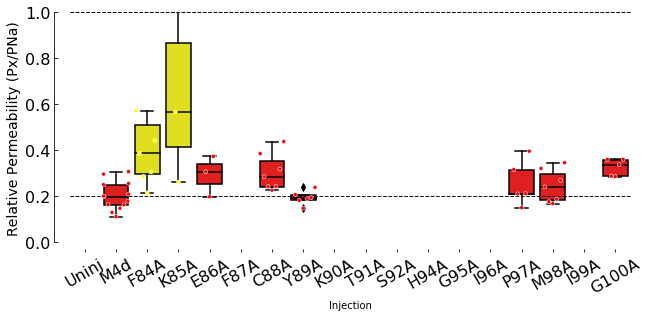

In [107]:
fig = plt.figure(figsize=(12, 4.5)) 
#plt.subplots(2, 2, sharex='col')
ax1 = plt.subplot(1,1,1)


orderCons = ["uninjected","mg419mg012","mg738mg012","mg739mg012","mg740mg012","mg741mg012","mg748mg012","mg759mg012","mg745mg012","mg752mg012","mg749mg012","mg750mg012","mg746mg012","mg747mg012", "mg760mg012","mg753mg012","mg761mg012","mg751mg012"]

labels2 = ['Uninj','M4d','F84A','K85A','E86A','F87A','C88A','Y89A','K90A','T91A','S92A','H94A','G95A','I96A','P97A','M98A','I99A','G100A']


sns.swarmplot(x= Potassium['Injection'], y=Potassium['Permeability'], data = Potassium,palette=sns.color_palette(colors), edgecolor='white', linewidth=0.5, ax = ax1, size = 4,order=orderCons)#order=["mg419mg012","pTL69mg012","mg418mg012","mg418mg419mg012"]
sns.boxplot(x= Potassium['Injection'], y=Potassium['Permeability'], data = Potassium, palette=sns.color_palette(colors),ax=ax1,order=orderCons)


#sns.swarmplot(y=Datamg418['PCs/Na-DT1d'], data = Datamg418,palette=sns.color_palette(colorsSINGLES), edgecolor='white', linewidth=0.5, size = 4)


YlimitPerm = [0,1]

##### AXIS 1 ####
ax1.set_ylim(YlimitPerm)
ax1.spines['right'].set_visible(False)                                  # no spine at the right
ax1.spines['top'].set_visible(False)  # no spine at the top
ax1.spines['bottom'].set_visible(False)  
ax1.yaxis.set_ticks_position('left')                                     # ticks at the left
ax1.xaxis.set_ticks_position('bottom')                                 # no spine at the right
ax1.spines['left'].set_position(('outward',15))                           # a spine at the left that is put a little aside
ax1.spines['bottom'].set_position(('outward',10))  
ax1.spines['top'].set_position(('axes',5)) 
ax1.get_yaxis().set_tick_params(direction='in')
ax1.get_xaxis().set_tick_params(direction='in')
ax1.plot([-1,50], [1,1] , 'k--', color='#000000', linewidth=1) #gray line for Zero or 1       
ax1.plot([-1,50], [0.2,0.2] , 'k--', color='#111111', linewidth=1) #gray line for Zero or 1     
ax1.tick_params(axis='both', which='major', labelsize=16)  
#ax1.set_title('lithium',size=10) 
ax1.yaxis.label.set_size(20)
ax1.set_ylabel('Relative Permeability (Px/PNa)', fontsize=14)

#ax1.xaxis.set_visible(False)
ax1.set_xticklabels(labels2,rotation=30)



plt.gcf().subplots_adjust(bottom=0.17, left=0.25,right=None, top=None,hspace=0.75, wspace=0.2) 

plt.savefig(filedirExportFig+"PermeabilityNtermAlanin"+'.pdf')


